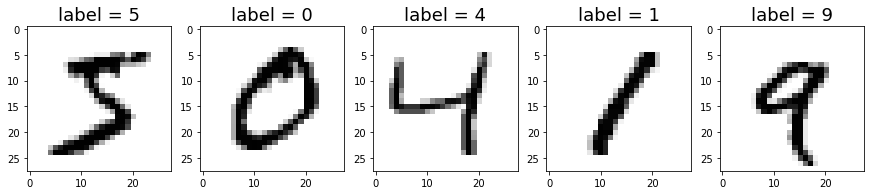

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

"""Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:"""

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.gcf().set_size_inches(15, 4)  #←設定圖形的寬和高 (英吋)
for i in range(5):
    ax = plt.subplot(1, 5, 1+i)  #←設定 1x5 的子圖表, 目前要畫第 1+i 個
    ax.imshow(x_train[i], cmap= 'binary')
    ax.set_title('label = '+str(y_train[i]), fontsize=18)  #←設定標題
plt.show()  #將圖形顯示出來

x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
from tensorflow.keras import Input, Model, layers
img_input = Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(img_input)
x = layers.Conv2D(63, (3, 3), activation='relu')(x)
x = layers.MaxPool2D(2, 2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_2 = Model(inputs = img_input, outputs=outputs, name='model-2')
model_2.summary()

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 63)        18207     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 63)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1161344   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0   

In [4]:
tf.keras.backend.image_data_format()

'channels_last'

In [0]:
num_classes = 10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
predictions = model_2(x_train[:1]).numpy()
predictions

array([[0.10012563, 0.10055604, 0.09197234, 0.10297363, 0.09949781,
        0.09750111, 0.1007548 , 0.0963275 , 0.109248  , 0.10104315]],
      dtype=float32)

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
loss_fn = tf.keras.losses.CategoricalCrossentropy()
loss_fn(y_train[:1], predictions).numpy()

2.3278916

In [8]:
model_2.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
#history = model_2.fit(x_train, y_train, epochs=10, batch_size=64, verbose=2, validation_data=(x_test, y_test))
history = model_2.fit(x_train, y_train, epochs=5, batch_size=64, verbose=2)

Epoch 1/5
938/938 - 8s - loss: 0.1391 - accuracy: 0.9579
Epoch 2/5
938/938 - 8s - loss: 0.0479 - accuracy: 0.9851
Epoch 3/5
938/938 - 8s - loss: 0.0315 - accuracy: 0.9901
Epoch 4/5
938/938 - 8s - loss: 0.0236 - accuracy: 0.9921
Epoch 5/5
938/938 - 8s - loss: 0.0181 - accuracy: 0.9939


In [9]:
model_2.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0346 - accuracy: 0.9891


[0.03456918150186539, 0.9890999794006348]

In [0]:
import numpy as np
predictions = np.argmax(model_2.predict(x_test), axis=1)
ans = np.argmax(y_test, axis=1)

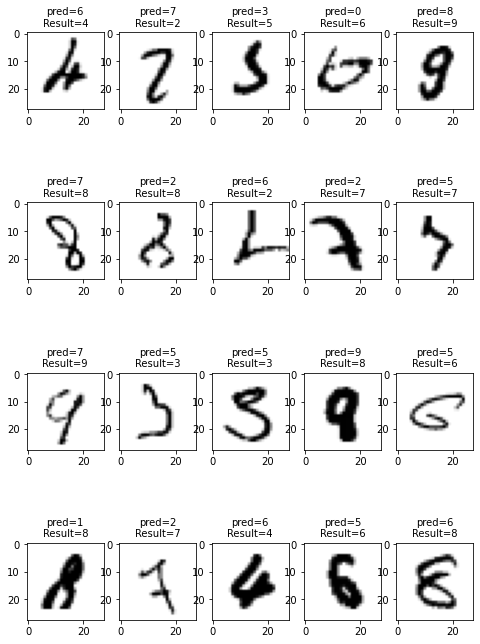

In [11]:
image_idx = 1
plt.gcf().set_size_inches(8, 12)  #←設定圖形的寬和高 (英吋)
for i, (_a, _b) in enumerate(zip(predictions, ans)):
  if _a != _b:
    ax = plt.subplot(4, 5, image_idx) 
    ax.imshow(x_test[i,:,:,0], cmap= 'binary') 
    ax.set_title(f'pred={_a}\nResult={_b}', fontsize=10)
    image_idx += 1
    if image_idx > 20: break
plt.show()

In [12]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [0]:
from PIL import Image
import numpy as np
im = np.array(Image.open('/content/drive/My Drive/num7.jpg'))

In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [0]:
print(im.dtype)
print(im.ndim)
print(im.shape)

In [0]:
import matplotlib.pyplot as plt
gray = rgb2gray(im)    
plt.imshow(gray, cmap='gray')
plt.show()

In [0]:
print(gray.dtype)
print(gray.ndim)
print(gray.shape)

In [0]:
#img = im.resize((28, 28), Image.ANTIALIAS)
new_img_arr = np.array(Image.fromarray(im[:,:,0]).resize((28, 28), Image.ANTIALIAS))
new_img_arr = new_img_arr/255.0

In [0]:
new_img_arr.shape

In [0]:
model_2.predict(new_img_arr.reshape(1, 28, 28, 1))

In [0]:
predictions = np.argmax(model_2.predict(new_img_arr.reshape(1, 28, 28, 1)), axis=1)
predictions